In [37]:
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline
import graphviz
import dtreeviz
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
plt.style.use('bmh')

In [45]:
def describe_datos(df):
    unicos =[]
    for col in df:
        unicos.append(df[col].unique())
    unicos = pd.Series(unicos, index=df.columns)
    descripcion = pd.concat([df.dtypes, df.isna().sum(),df.nunique(),unicos], axis=1)
    descripcion.columns = ['dtypes', 'null','nunique','unique' ]
    return descripcion

In [39]:
pathDatos = os.path.join(os.path.pardir,'datos')

In [40]:
def agregar_ceros(num, longitud):
    return str(num).zfill(longitud)

In [41]:
df = pd.read_csv(os.path.join(pathDatos,'churn_telecom.csv'))

df.head(3)

,Estado,Dias de antiguedad,Codigo Postal,Plan Internacional,Plan Correo de voz,Total Correos de Voz,Minutos Dia,Llamadas Dia,Cargos Dia,Minutos Tarde,Llamadas Tarde,Cargos Tarde,Minutos Noche,Llamadas Noche,Cargos Noche,Minutos Internacional,Llamadas Internacional,Cargos Internacional,Llamadas Servicio al Cliente,Abandono
0,KS,128,415,No,Si,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Si,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [42]:
df.shape

(3333, 20)

In [43]:
# Exploramos tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Estado                        3333 non-null   object 
 1   Dias de antiguedad            3333 non-null   int64  
 2   Codigo Postal                 3333 non-null   int64  
 3   Plan Internacional            3333 non-null   object 
 4   Plan Correo de voz            3333 non-null   object 
 5   Total Correos de Voz          3333 non-null   int64  
 6   Minutos Dia                   3333 non-null   float64
 7   Llamadas Dia                  3333 non-null   int64  
 8   Cargos Dia                    3333 non-null   float64
 9   Minutos Tarde                 3333 non-null   float64
 10  Llamadas Tarde                3333 non-null   int64  
 11  Cargos Tarde                  3333 non-null   float64
 12  Minutos Noche                 3333 non-null   float64
 13  Lla

In [46]:
# Descripción del DataFrame
describe_datos(df)

,dtypes,null,nunique,unique
Estado,object,0,51,"[KS, OH, NJ, OK, AL, MA, MO, WV, RI, IA, MT, I..."
Dias de antiguedad,int64,0,212,"[128, 107, 137, 84, 75, 118, 121, 147, 141, 74..."
Codigo Postal,int64,0,3,"[415, 408, 510]"
Plan Internacional,object,0,2,"[No, Si]"
Plan Correo de voz,object,0,2,"[Si, No]"
Total Correos de Voz,int64,0,46,"[25, 26, 0, 24, 37, 27, 33, 39, 41, 28, 30, 34..."
Minutos Dia,float64,0,1667,"[265.1, 161.6, 243.4, 299.4, 166.7, 223.4, 218..."
Llamadas Dia,int64,0,119,"[110, 123, 114, 71, 113, 98, 88, 79, 84, 127, ..."
Cargos Dia,float64,0,1667,"[45.07, 27.47, 41.38, 50.9, 28.34, 37.98, 37.0..."
Minutos Tarde,float64,0,1611,"[197.4, 195.5, 121.2, 61.9, 148.3, 220.6, 348...."


In [47]:
# CONVERSIÓN DE TIPO DE DATO
df['Codigo Postal'] = df['Codigo Postal'].astype('object')
df['Codigo Postal'] = df['Codigo Postal'].apply(lambda row: agregar_ceros(row,5))
df['Abandono'] = df['Abandono'].astype(int)

In [48]:
df.head()

,Estado,Dias de antiguedad,Codigo Postal,Plan Internacional,Plan Correo de voz,Total Correos de Voz,Minutos Dia,Llamadas Dia,Cargos Dia,Minutos Tarde,Llamadas Tarde,Cargos Tarde,Minutos Noche,Llamadas Noche,Cargos Noche,Minutos Internacional,Llamadas Internacional,Cargos Internacional,Llamadas Servicio al Cliente,Abandono
0,KS,128,00415,No,Si,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,00415,No,Si,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,00415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,00408,Si,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,00415,Si,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [49]:
# PROPORCION DE NUESTRAS CLASES A PREDECIR
df['Abandono'].value_counts(normalize=True)

Abandono
0    0.855086
1    0.144914
Name: proportion, dtype: float64

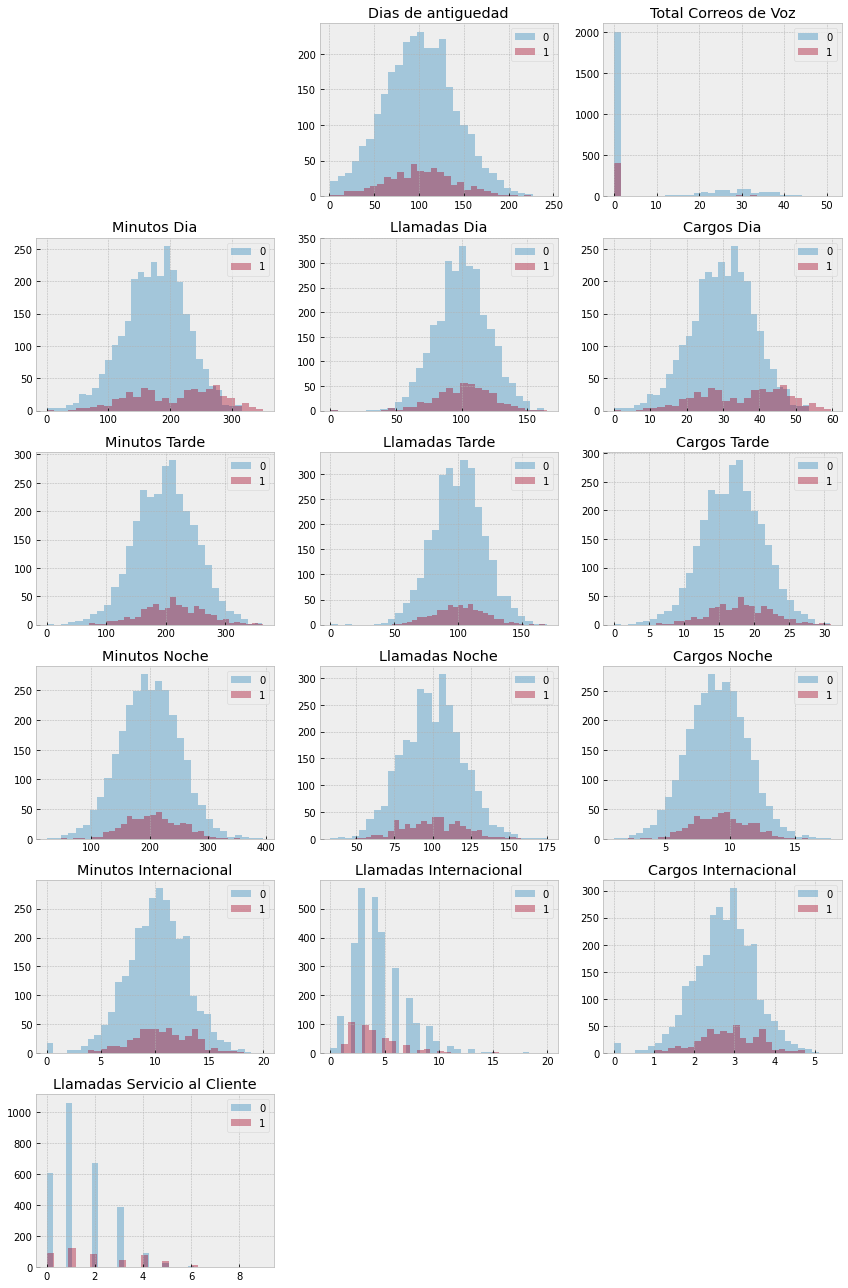

In [50]:
numericas_cols = df.select_dtypes('number').columns
numericas_cols[:-1]

fig, subplot = plt.subplots(nrows=6, ncols=3, figsize=(12, 18))
subplot= subplot.flatten()  # facilita iterar por cada grafica

for i, column in enumerate(numericas_cols[:-1]):
    df.groupby('Abandono')[column].hist(alpha=0.4, bins=30, ax=subplot[i+1])
    subplot[i+1].set_title(column)
    subplot[i+1].legend(df['Abandono'].unique())

plt.tight_layout()
subplot[0].set_visible(False)
subplot[-1].set_visible(False)
subplot[-2].set_visible(False)
plt.show()

In [11]:
for col in df.select_dtypes(object)[::-1].columns:
    print(pd.crosstab(df[col],
                      df['Abandono'],
                      normalize='index'
                      ).round(2).sort_values(by=1,  ascending=False),
          end='\n\n')

Abandono     0     1
Estado              
NJ        0.74  0.26
CA        0.74  0.26
TX        0.75  0.25
MD        0.76  0.24
SC        0.77  0.23
MI        0.78  0.22
MS        0.78  0.22
MT        0.79  0.21
NV        0.79  0.21
ME        0.79  0.21
WA        0.79  0.21
AR        0.80  0.20
KS        0.81  0.19
NY        0.82  0.18
PA        0.82  0.18
MN        0.82  0.18
MA        0.83  0.17
NC        0.84  0.16
NH        0.84  0.16
CT        0.84  0.16
GA        0.85  0.15
OK        0.85  0.15
DE        0.85  0.15
OR        0.86  0.14
KY        0.86  0.14
UT        0.86  0.14
CO        0.86  0.14
SD        0.87  0.13
FL        0.87  0.13
OH        0.87  0.13
IN        0.87  0.13
WY        0.88  0.12
ID        0.88  0.12
VT        0.89  0.11
MO        0.89  0.11
NM        0.90  0.10
ND        0.90  0.10
AL        0.90  0.10
IL        0.91  0.09
RI        0.91  0.09
TN        0.91  0.09
WV        0.91  0.09
DC        0.91  0.09
WI        0.91  0.09
LA        0.92  0.08
NE        0.9

In [51]:
# VALORES NULOS
detalles_nulos = pd.DataFrame({
    'Cantidad de Nulos': df.isnull().sum(),
    'Porcentaje de Nulos': (df.isnull().mean() * 100).round(2)
})
detalles_nulos = detalles_nulos[detalles_nulos['Cantidad de Nulos'] > 0]

In [52]:
detalles_nulos

,Cantidad de Nulos,Porcentaje de Nulos


In [53]:
categoricas_cols = df.select_dtypes(object).columns
categoricas_cols

Index(['Estado', 'Codigo Postal', 'Plan Internacional', 'Plan Correo de voz'], dtype='object')

In [54]:
df[categoricas_cols].nunique()

Estado                51
Codigo Postal          3
Plan Internacional     2
Plan Correo de voz     2
dtype: int64

## Procesamiento de variables categoricas

In [55]:
categoricas_cols = df.select_dtypes(object).columns
categoricas_cols

Index(['Estado', 'Codigo Postal', 'Plan Internacional', 'Plan Correo de voz'], dtype='object')

In [56]:
# Obtenermos el número de categorias de cada variable
df[categoricas_cols].nunique()

Estado                51
Codigo Postal          3
Plan Internacional     2
Plan Correo de voz     2
dtype: int64

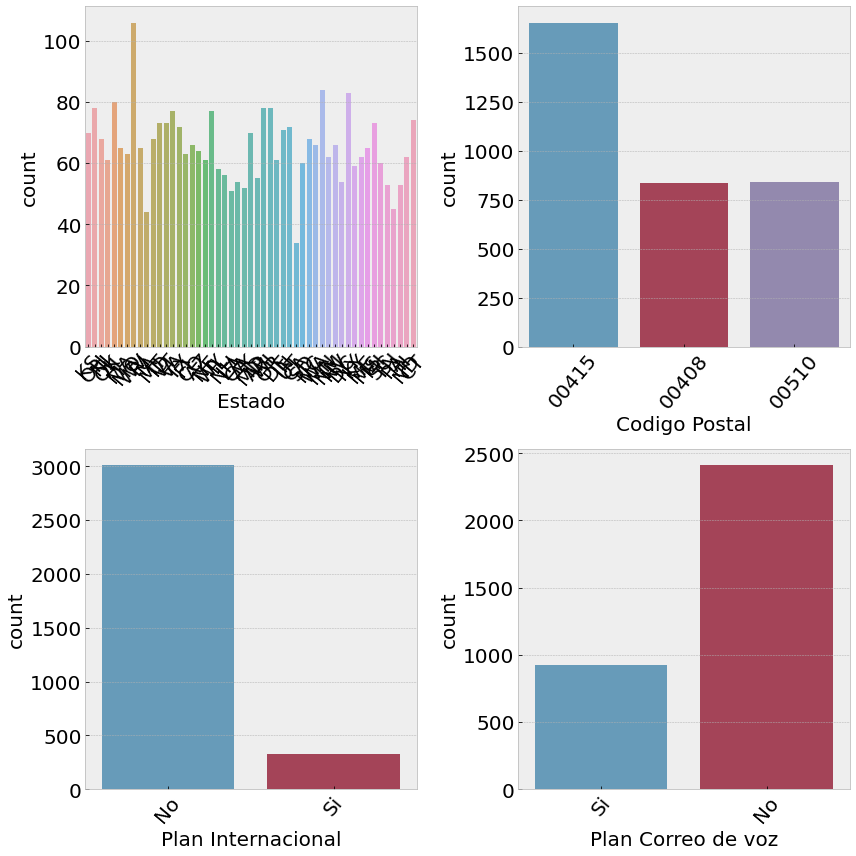

In [57]:
def plot_categoricas(df, ax_width=6, ax_height=6, angle=50, n_cols=4, size=20):
    import math
    df_cat = df.select_dtypes(include=['object', 'category'])
    n_rows = math.ceil(len(df_cat.columns)/n_cols)
    fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(ax_width * n_cols, ax_height * n_rows))
    for i, chart in enumerate(ax.flatten()):
        if i < len(df_cat.columns):
            sns.countplot(x=df_cat.iloc[:, i], ax=chart, alpha=0.8)
            chart.tick_params(axis='x', rotation=angle, labelsize=size)
            chart.tick_params(axis='y', labelsize=size)
            chart.xaxis.label.set_size(size)
            chart.yaxis.label.set_size(size)
        else:
            chart.set_visible(False)
    plt.tight_layout()
    
# generamos los histogramas de las variables categoricas    
plot_categoricas(df, n_cols=2)

In [59]:
# transorfmamos los valores de las columnas 'Plan Internacional' y 'Plan Correo de voz' en valores númericos 1: si, 0:no
var_binarias = ['Plan Internacional','Plan Correo de voz']

for var in var_binarias:
    df[var] = df[var].apply(lambda row: 1 if row=='Si' else 0)

In [60]:
df['Plan Internacional'].value_counts()

Plan Internacional
0    3010
1     323
Name: count, dtype: int64

In [66]:
df = pd.get_dummies(df)

In [67]:
df.head()

,Dias de antiguedad,Plan Internacional,Plan Correo de voz,Total Correos de Voz,Minutos Dia,Llamadas Dia,Cargos Dia,Minutos Tarde,Llamadas Tarde,Cargos Tarde,Minutos Noche,Llamadas Noche,Cargos Noche,Minutos Internacional,Llamadas Internacional,Cargos Internacional,Llamadas Servicio al Cliente,Abandono,Estado_AK,Estado_AL,Estado_AR,Estado_AZ,Estado_CA,Estado_CO,Estado_CT,Estado_DC,Estado_DE,Estado_FL,Estado_GA,Estado_HI,Estado_IA,Estado_ID,Estado_IL,Estado_IN,Estado_KS,Estado_KY,Estado_LA,Estado_MA,Estado_MD,Estado_ME,Estado_MI,Estado_MN,Estado_MO,Estado_MS,Estado_MT,Estado_NC,Estado_ND,Estado_NE,Estado_NH,Estado_NJ,Estado_NM,Estado_NV,Estado_NY,Estado_OH,Estado_OK,Estado_OR,Estado_PA,Estado_RI,Estado_SC,Estado_SD,Estado_TN,Estado_TX,Estado_UT,Estado_VA,Estado_VT,Estado_WA,Estado_WI,Estado_WV,Estado_WY,Codigo Postal_00408,Codigo Postal_00415,Codigo Postal_00510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [68]:
# separacion de las muestras 
y = df['Abandono']
X = df.drop('Abandono', axis=1)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=8)

# ¿Cómo son los conjuntos de entrenamiento y prueba?
print("TRAINING SET")
print("X: ", X_train.shape)
print("y: ", y_train.shape)
print('Clientes que cancelan:{:7.3f}%'.format(y_train.mean()*100),'\n')

print("TEST SET")
print("X: ", X_test.shape)
print("y: ", y_test.shape)
print('Clientes que cancelan:{:7.3f}%'.format(y_test.mean()*100))

TRAINING SET
X:  (2666, 71)
y:  (2666,)
Clientes que cancelan: 14.404% 

TEST SET
X:  (667, 71)
y:  (667,)
Clientes que cancelan: 14.843%


In [71]:
X_train.head()

,Dias de antiguedad,Plan Internacional,Plan Correo de voz,Total Correos de Voz,Minutos Dia,Llamadas Dia,Cargos Dia,Minutos Tarde,Llamadas Tarde,Cargos Tarde,Minutos Noche,Llamadas Noche,Cargos Noche,Minutos Internacional,Llamadas Internacional,Cargos Internacional,Llamadas Servicio al Cliente,Estado_AK,Estado_AL,Estado_AR,Estado_AZ,Estado_CA,Estado_CO,Estado_CT,Estado_DC,Estado_DE,Estado_FL,Estado_GA,Estado_HI,Estado_IA,Estado_ID,Estado_IL,Estado_IN,Estado_KS,Estado_KY,Estado_LA,Estado_MA,Estado_MD,Estado_ME,Estado_MI,Estado_MN,Estado_MO,Estado_MS,Estado_MT,Estado_NC,Estado_ND,Estado_NE,Estado_NH,Estado_NJ,Estado_NM,Estado_NV,Estado_NY,Estado_OH,Estado_OK,Estado_OR,Estado_PA,Estado_RI,Estado_SC,Estado_SD,Estado_TN,Estado_TX,Estado_UT,Estado_VA,Estado_VT,Estado_WA,Estado_WI,Estado_WV,Estado_WY,Codigo Postal_00408,Codigo Postal_00415,Codigo Postal_00510
2342,123,0,0,0,175.7,78,29.87,184.6,96,15.69,156.9,92,7.06,9.1,2,2.46,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
1142,101,0,1,33,219.7,137,37.35,186.8,94,15.88,184.5,113,8.30,9.5,2,2.57,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
830,79,0,0,0,147.0,72,24.99,165.7,102,14.08,243.2,107,10.94,8.4,9,2.27,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3207,68,0,0,0,158.8,119,27.00,211.8,105,18.00,198.1,101,8.91,10.3,3,2.78,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
2419,169,0,0,0,266.7,105,45.34,158.2,88,13.45,287.7,111,12.95,13.8,3,3.73,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False


# Entrenamiento

In [72]:
profundidad = None

# Entrenamiento del modelo.
clasificador = DecisionTreeClassifier( max_depth=profundidad,
                                      criterion="entropy",
                                      random_state=0)
clasificador.fit(X_train, y_train)
print("La profundida del árbol es: {}".format(clasificador.get_depth()))


# Predicción y evaluación sobre el conjunto de entrenamiento.
y_pred_train = clasificador.predict(X_train)
exactitud_train = accuracy_score(y_train, y_pred_train)*100
print("Exactitud conjunto de entrenamiento: {:4.2f}%".format(exactitud_train))


# Predicción y evaluación sobre el conjunto de prueba.
y_pred_test = clasificador.predict(X_test)
exactitud_test = accuracy_score(y_test, y_pred_test)*100
print("Exactitud conjunto de prueba: {:4.2f}%".format(exactitud_test),'\n')

La profundida del árbol es: 22
Exactitud conjunto de entrenamiento: 100.00%
Exactitud conjunto de prueba: 90.10% 



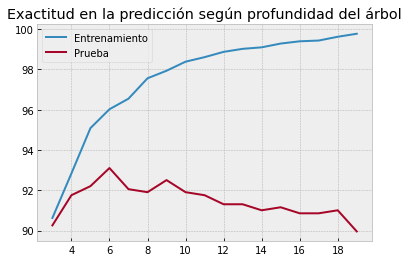

In [73]:
# Entrenamiento y prueba del modelo con distintos niveles de profunidad

modelos = {}
y_pred_train = {}
y_pred_test = {}
exactitud_train={}
exactitud_test = {}

for p in range(3,20):
    # Entrenamiento del modelo
    modelos[p] = DecisionTreeClassifier(max_depth = p,
                               criterion = "entropy",
                               random_state = 0).fit(X_train, y_train)

    # Predicción y evaluación sobre el conjunto de entrenamiento
    y_pred_train[p] = modelos[p].predict(X_train)
    exactitud_train[p] = accuracy_score(y_train, y_pred_train[p])*100

    # Predicción y evaluación sobre el conjunto de prueba
    y_pred_test[p] = modelos[p].predict(X_test)
    exactitud_test[p] = accuracy_score(y_test, y_pred_test[p])*100

exactitud_df = pd.DataFrame( {'Entrenamiento':exactitud_train,
                           'Prueba': exactitud_test})

exactitud_df.plot.line(
    title ='Exactitud en la predicción según profundidad del árbol')
plt.show()

In [75]:
exactitud_df

,Entrenamiento,Prueba
3,90.622656,90.254873
4,92.835709,91.754123
5,95.086272,92.203898
6,96.024006,93.103448
7,96.549137,92.053973
8,97.561890,91.904048
9,97.936984,92.503748
10,98.387097,91.904048
11,98.612153,91.754123
12,98.874719,91.304348


In [74]:
profundidad_optima = exactitud_df['Prueba'].idxmax()
profundidad_optima

6

In [76]:
arbolGanador = modelos[profundidad_optima]
arbolGanador

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

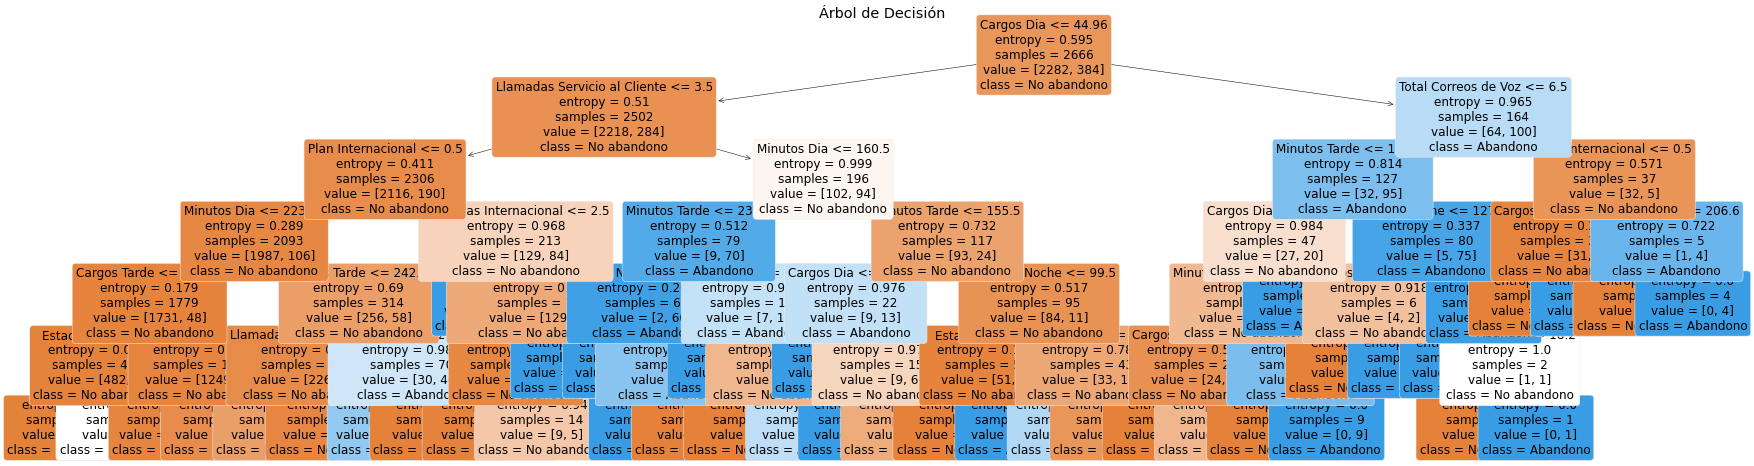

In [77]:
plt.figure(figsize=(30, 8))
plot_tree(
    arbolGanador,
    feature_names=X.columns,
    class_names=['No abandono','Abandono'],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Árbol de Decisión")
plt.show()

# importancia de las variables

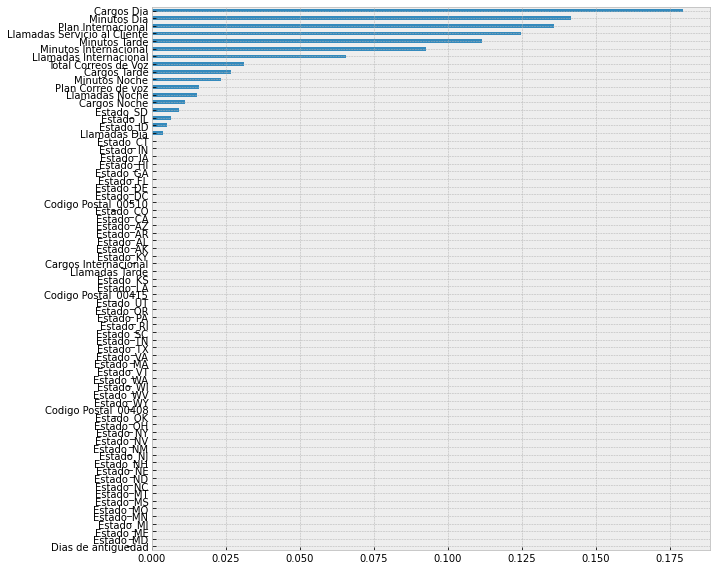

In [78]:
importancia = pd.Series(arbolGanador.feature_importances_,
                    index=X.columns.values)

importancia.sort_values().plot(kind = 'barh',figsize=(10, 10))
plt.show()

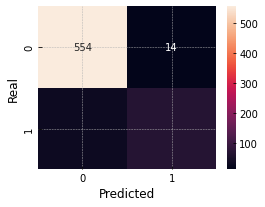

In [79]:
#Matriz de confusión
data = {'y_Real':y_test, 'y_Prediccion':arbolGanador.predict(X_test)}

df = pd.DataFrame(data)
confusion_matrix = pd.crosstab(df['y_Real'], df['y_Prediccion'],
                               rownames=['Real'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

In [32]:
confusion_matrix

Predicted,0,1
Real,,
0,554,14
1,32,67


In [33]:
pd.DataFrame(arbolGanador.predict_proba(X_test), columns=['No Abandono', 'Abandono']).head(20)

,No Abandono,Abandono
0,0.972198,0.027802
1,1.000000,0.000000
2,0.993789,0.006211
3,1.000000,0.000000
4,0.958333,0.041667
5,0.000000,1.000000
6,0.993789,0.006211
7,0.993789,0.006211
8,0.000000,1.000000
9,0.958333,0.041667


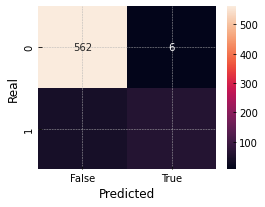

In [84]:
umbral = 0.99 # por arriba del cual se clasificaría como clase 1
prediccion_test = np.where( arbolGanador.predict_proba(X_test)[:, 1] > umbral, True, False)
data = {'y_Real':  y_test,
        'y_Prediccion': prediccion_test
        }

evaluacion_df = pd.DataFrame(data)
confusion_matrix = pd.crosstab(evaluacion_df['y_Real'], evaluacion_df['y_Prediccion'], rownames=['Real'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

In [85]:
confusion_matrix

Predicted,False,True
Real,,
0,562,6
1,40,59
